In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

In [155]:
df = pd.read_csv("../data/predictions.csv")

In [160]:
predicted_cols = [
    "goal_xP", "assist_xP", "cs_xP", "bonus_xP", "concede_xP", "xP"
]

point_cols = [
    "goal_points", "assist_points", "cs_points", "bonus", "concede_points"
]

stat_cols = [
    "goals_scored", "assists", "clean_sheets", "bonus", "goals_conceded"
]
params_json = from_json("../data/params.json")



def calculate_points(row):
    stat_values = params_json[row["position"]]["stat_values"]
    return row[stat_cols] * stat_values
known_point_totals = rows[rows["gameweek"] < 34].copy()
known_point_totals[point_cols] = known_point_totals.apply(
    calculate_points, axis=1, result_type="expand")
all_point_cols = point_cols + ["total_points"]
known_point_totals["concede_points"] = - known_point_totals["goals_conceded"] // 2

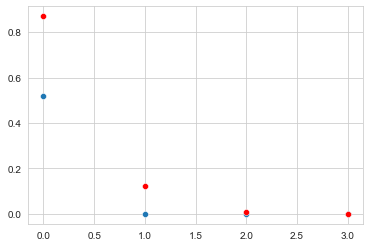

In [228]:
import seaborn as sns
sns.set_style('whitegrid')
player = "Gabriel Teodoro Martinelli Silva"
stat = "bonus_xP"
avg_stat = "bonus"

x = [0,1,2,3]
# dfp = known_point_totals[known_point_totals["player_name"] == player]
dfp = known_point_totals
def freq(g):
    return len(dfp[dfp[stat] == g]) / len(dfp)
# plt.hist(dfp["npxG"])
sns.scatterplot(x=x, y=[freq(g) for g in x])
sns.scatterplot(x=x, y=poisson(dfp[avg_stat].mean()).pmf(x), color='red')
plt.show()
# len(dfp[dfp[stat] == 1]) / len(dfp)